In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(harmony))
suppressMessages(library(scrattch.hicat))
library(Seurat)

In [2]:

marmoset=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/marmoset/batch_normalize_renew_240115/dif_res_anno/final_anno/39cl_240301_Cluster_Supercluster_res10.rds')
mouse=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/mouse/batch_normalize_renew_240115/dif_res_anno/final_anno/60cl_240130_Cluster_Supercluster_res12.rds')
macaque=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/batch_normalize_renew_0105/dif_res_anno1/final_anno/48cl_240118_merge_oligo_Cluster_Supercluster_res12.rds')



In [3]:
table(marmoset$Cluster)


     Astrocytes_0      Astrocytes_1      Endotheial_0       GABA_CHC_10 
             3128              2479               293               304 
      GABA_DRD2_0      GABA_LAMP5_9 GABA_LAMP5_LHX6_4      GABA_PVALB_0 
             5225               687              1096              3335 
     GABA_PVALB_2      GABA_PVALB_3      GABA_PVALB_7       GABA_RELN_8 
             1343              1118               771               754 
       GABA_SST_1        GABA_SST_6        GABA_VIP_5     GLUT_GNB4-_11 
             1766               920              1076              2729 
    GLUT_GNB4-_12     GLUT_GNB4-_13     GLUT_GNB4-_14     GLUT_GNB4-_16 
             2050              1942              1645               965 
    GLUT_GNB4-_19      GLUT_GNB4-_3      GLUT_GNB4-_6      GLUT_GNB4+_0 
              670              7304              5165              9242 
     GLUT_GNB4+_1     GLUT_GNB4+_15     GLUT_GNB4+_17     GLUT_GNB4+_18 
             9039              1028               

In [4]:
Idents(marmoset)='Cluster'
marmoset1=subset(marmoset,downsample=350)

Idents(mouse)='Cluster'
mouse1=subset(mouse,downsample=230)

Idents(macaque)='Cluster'
macaque1=subset(macaque,downsample=300)

marmoset1@meta.data$merge_anno=paste0('marmoset_',marmoset1@meta.data$Cluster)
mouse1@meta.data$merge_anno=paste0('mouse_',mouse1@meta.data$Cluster)
macaque1@meta.data$merge_anno=paste0('macaque_',macaque1@meta.data$Cluster)

table(marmoset1@meta.data$merge_anno)
table(mouse1@meta.data$merge_anno)
table(macaque1$merge_anno)



     marmoset_Astrocytes_0      marmoset_Astrocytes_1 
                       350                        350 
     marmoset_Endotheial_0       marmoset_GABA_CHC_10 
                       293                        304 
      marmoset_GABA_DRD2_0      marmoset_GABA_LAMP5_9 
                       350                        350 
marmoset_GABA_LAMP5_LHX6_4      marmoset_GABA_PVALB_0 
                       350                        350 
     marmoset_GABA_PVALB_2      marmoset_GABA_PVALB_3 
                       350                        350 
     marmoset_GABA_PVALB_7       marmoset_GABA_RELN_8 
                       350                        350 
       marmoset_GABA_SST_1        marmoset_GABA_SST_6 
                       350                        350 
       marmoset_GABA_VIP_5     marmoset_GLUT_GNB4-_11 
                       350                        350 
    marmoset_GLUT_GNB4-_12     marmoset_GLUT_GNB4-_13 
                       350                        350 
    marmo


      mouse_Astrocytes_0       mouse_Astrocytes_1       mouse_Astrocytes_2 
                     230                      230                      230 
      mouse_Astrocytes_3       mouse_Endotheial_0       mouse_Endotheial_1 
                     230                      230                      230 
      mouse_Endotheial_3        mouse_GABA_CHC_15        mouse_GABA_CHC_17 
                     230                      230                      230 
       mouse_GABA_DRD2_0        mouse_GABA_DRD2_1        mouse_GABA_DRD2_2 
                     230                      230                      230 
       mouse_GABA_DRD2_3       mouse_GABA_LAMP5_6 mouse_GABA_LAMP5_LHX6_13 
                     230                      230                      230 
      mouse_GABA_PVALB_0      mouse_GABA_PVALB_10       mouse_GABA_PVALB_2 
                     230                      230                      230 
      mouse_GABA_PVALB_4       mouse_GABA_PVALB_5       mouse_GABA_PVALB_8 
           


     macaque_Astrocytes_0      macaque_Astrocytes_1      macaque_Endotheial_0 
                      300                       300                       300 
       macaque_GABA_CHC_9       macaque_GABA_DRD2_0       macaque_GABA_DRD2_1 
                      300                       300                       300 
      macaque_GABA_DRD2_2      macaque_GABA_LAMP5_4 macaque_GABA_LAMP5_LHX6_0 
                      300                       300                       300 
     macaque_GABA_PVALB_1     macaque_GABA_PVALB_12     macaque_GABA_PVALB_14 
                      300                       300                       300 
     macaque_GABA_PVALB_2      macaque_GABA_PVALB_8      macaque_GABA_RELN_10 
                      300                       300                       300 
     macaque_GABA_RELN_13       macaque_GABA_SST_15        macaque_GABA_SST_5 
                      300                       300                       300 
       macaque_GABA_SST_7       macaque_GABA_VIP_11

In [5]:
marmoset1
mouse1
macaque1

An object of class Seurat 
63792 features across 13512 samples within 2 assays 
Active assay: SCT (30873 features, 30873 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

An object of class Seurat 
91564 features across 13800 samples within 2 assays 
Active assay: SCT (42856 features, 42856 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

An object of class Seurat 
43267 features across 14400 samples within 2 assays 
Active assay: SCT (21304 features, 21304 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

In [6]:
homoCountMx = mouse1[["RNA"]]@counts
rownames(homoCountMx) = toupper(rownames(homoCountMx))
homoSeurat = CreateSeuratObject(counts=homoCountMx)
tmpDf = mouse1@meta.data
homoSeurat = AddMetaData(homoSeurat, metadata=tmpDf)
mouse1_renew=homoSeurat


table(marmoset1@meta.data$merge_anno)
table(mouse1_renew@meta.data$merge_anno)
table(macaque1$merge_anno)




     marmoset_Astrocytes_0      marmoset_Astrocytes_1 
                       350                        350 
     marmoset_Endotheial_0       marmoset_GABA_CHC_10 
                       293                        304 
      marmoset_GABA_DRD2_0      marmoset_GABA_LAMP5_9 
                       350                        350 
marmoset_GABA_LAMP5_LHX6_4      marmoset_GABA_PVALB_0 
                       350                        350 
     marmoset_GABA_PVALB_2      marmoset_GABA_PVALB_3 
                       350                        350 
     marmoset_GABA_PVALB_7       marmoset_GABA_RELN_8 
                       350                        350 
       marmoset_GABA_SST_1        marmoset_GABA_SST_6 
                       350                        350 
       marmoset_GABA_VIP_5     marmoset_GLUT_GNB4-_11 
                       350                        350 
    marmoset_GLUT_GNB4-_12     marmoset_GLUT_GNB4-_13 
                       350                        350 
    marmo


      mouse_Astrocytes_0       mouse_Astrocytes_1       mouse_Astrocytes_2 
                     230                      230                      230 
      mouse_Astrocytes_3       mouse_Endotheial_0       mouse_Endotheial_1 
                     230                      230                      230 
      mouse_Endotheial_3        mouse_GABA_CHC_15        mouse_GABA_CHC_17 
                     230                      230                      230 
       mouse_GABA_DRD2_0        mouse_GABA_DRD2_1        mouse_GABA_DRD2_2 
                     230                      230                      230 
       mouse_GABA_DRD2_3       mouse_GABA_LAMP5_6 mouse_GABA_LAMP5_LHX6_13 
                     230                      230                      230 
      mouse_GABA_PVALB_0      mouse_GABA_PVALB_10       mouse_GABA_PVALB_2 
                     230                      230                      230 
      mouse_GABA_PVALB_4       mouse_GABA_PVALB_5       mouse_GABA_PVALB_8 
           


     macaque_Astrocytes_0      macaque_Astrocytes_1      macaque_Endotheial_0 
                      300                       300                       300 
       macaque_GABA_CHC_9       macaque_GABA_DRD2_0       macaque_GABA_DRD2_1 
                      300                       300                       300 
      macaque_GABA_DRD2_2      macaque_GABA_LAMP5_4 macaque_GABA_LAMP5_LHX6_0 
                      300                       300                       300 
     macaque_GABA_PVALB_1     macaque_GABA_PVALB_12     macaque_GABA_PVALB_14 
                      300                       300                       300 
     macaque_GABA_PVALB_2      macaque_GABA_PVALB_8      macaque_GABA_RELN_10 
                      300                       300                       300 
     macaque_GABA_RELN_13       macaque_GABA_SST_15        macaque_GABA_SST_5 
                      300                       300                       300 
       macaque_GABA_SST_7       macaque_GABA_VIP_11

In [7]:
combineSeuratList = list(
    marmoset=marmoset1,
    mouse=mouse1_renew,
    macaque=macaque1
)
combineSeuratList = lapply(combineSeuratList, function(seurat) {
    seurat = SCTransform(
        seurat, assay="RNA",
        ncells=ncol(seurat[["RNA"]]), 
        variable.features.n=3000,
        return.only.var.genes = F,
        method = "glmGamPoi"
    ) %>%
        RunPCA(verbose = FALSE) %>%
        FindNeighbors(dims = 1:30) %>%
        FindClusters(verbose = FALSE) %>%
        RunUMAP(dims = 1:30)
    return(seurat)
})




Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 25817 by 13512

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 13512 cells



  |======================================================================| 100%


Found 43 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 25817 genes



  |======================================================================| 100%


Computing corrected count matrix for 25817 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.047523 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:40:22 UMAP embedding parameters a = 0.9922 b = 1.112

13:40:22 Read 13512 rows and found 30 numeric columns

13:40:22 Using Annoy for neighbor search, n_neighbors = 30

13:40:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:40:23 W

  |======================================================================| 100%


Found 42 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28409 genes



  |======================================================================| 100%


Computing corrected count matrix for 28409 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.518808 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

13:45:36 UMAP embedding parameters a = 0.9922 b = 1.112

13:45:36 Read 13800 rows and found 30 numeric columns

13:45:36 Using Annoy for neighbor search, n_neighbors = 30

13:45:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:45:41 Writing NN index file to temp file /tmp/RtmprIsHwb/filedd99b69ec85

13:45:41 Searching Annoy index using 1 thread, search_k = 3000

13:45:45 Annoy recall = 100%

13:45:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:45:51 Initializing from 

  |======================================================================| 100%


Found 91 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18741 genes



  |======================================================================| 100%


Computing corrected count matrix for 18741 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.133446 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

13:50:20 UMAP embedding parameters a = 0.9922 b = 1.112

13:50:20 Read 14400 rows and found 30 numeric columns

13:50:20 Using Annoy for neighbor search, n_neighbors = 30

13:50:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:50:21 Writing NN index file to temp file /tmp/RtmprIsHwb/filedd9964c3095f

13:50:21 Searching Annoy index using 1 thread, search_k = 3000

13:50:25 Annoy recall = 100%

13:50:27 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:50:31 Initializing from

In [8]:
outdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240130/data'

saveRDS(combineSeuratList, paste0(outdir, "/3species_compare_seurat_ALL_down300_List_0301.rds"))



In [9]:

# Try find markers by hicat
combineSeuratList$marmoset$clusterNameMod = combineSeuratList$marmoset$merge_anno
combineSeuratList$mouse$clusterNameMod = combineSeuratList$mouse$merge_anno
combineSeuratList$macaque$clusterNameMod = combineSeuratList$macaque$merge_anno

combineSeuratList$marmoset$clusterNameMod = gsub("(-| |/)", "_", combineSeuratList$marmoset$clusterNameMod)
combineSeuratList$mouse$clusterNameMod = gsub("(-| |/)", "_", combineSeuratList$mouse$clusterNameMod)
combineSeuratList$macaque$clusterNameMod = gsub("(-| |/)", "_", combineSeuratList$macaque$clusterNameMod)

combineSeuratList$marmoset$clusterNameMod_rn = gsub("_", "", combineSeuratList$marmoset$clusterNameMod)
combineSeuratList$mouse$clusterNameMod_rn = gsub("_", "", combineSeuratList$mouse$clusterNameMod)
combineSeuratList$macaque$clusterNameMod_rn = gsub("_", "", combineSeuratList$macaque$clusterNameMod)

combineSeuratList$marmoset$clusterNameMod_rn = gsub("\\+", "888", combineSeuratList$marmoset$clusterNameMod_rn)
combineSeuratList$mouse$clusterNameMod_rn = gsub("\\+", "888", combineSeuratList$mouse$clusterNameMod_rn)
combineSeuratList$macaque$clusterNameMod_rn = gsub("\\+", "888", combineSeuratList$macaque$clusterNameMod_rn)


macaque1=combineSeuratList$macaque
Idents(macaque1)='clusterNameMod_rn'
sub_macaque1=subset(macaque1,downsample=200)
macaqueVarGene = select_markers(sub_macaque1@assays$SCT@counts, sub_macaque1$clusterNameMod_rn, n.markers = 100)
macaqueHicatMarker = macaqueVarGene$markers

marmoset1=combineSeuratList$marmoset
Idents(marmoset1)='clusterNameMod_rn'
sub_marmoset1=subset(marmoset1,downsample=200)
marmosetVarGene = select_markers(sub_marmoset1@assays$SCT@counts, sub_marmoset1$clusterNameMod_rn, n.markers = 100)
marmosetHicatMarker = marmosetVarGene$markers

mouse1=combineSeuratList$mouse
Idents(mouse1)='clusterNameMod_rn'
sub_mouse1=subset(mouse1,downsample=200)
mouseVarGene = select_markers(sub_mouse1@assays$SCT@counts, sub_mouse1$clusterNameMod_rn, n.markers = 100)
mouseHicatMarker = mouseVarGene$markers


#marmosetVarGene = select_markers(combineSeuratList$marmoset@assays$SCT@counts, combineSeuratList$marmoset$clusterNameMod_rn, n.markers = 100)
#marmosetHicatMarker = marmosetVarGene$markers
#mouseVarGene = select_markers(combineSeuratList$mouse@assays$SCT@counts, combineSeuratList$mouse$clusterNameMod_rn, n.markers = 100)
#mouseHicatMarker = mouseVarGene$markers
#macaqueVarGene = select_markers(combineSeuratList$macaque@assays$SCT@counts, combineSeuratList$macaque$clusterNameMod_rn, n.markers = 100)
#macaqueHicatMarker = macaqueVarGene$markers


hicatMarker = Reduce(union, list(marmosetHicatMarker, mouseHicatMarker, macaqueHicatMarker))
length(hicatMarker)
hicatMarker = hicatMarker[which(hicatMarker %in% rownames(combineSeuratList$marmoset@assays$SCT@counts))]
length(hicatMarker)
hicatMarker = hicatMarker[which(hicatMarker %in% rownames(combineSeuratList$mouse@assays$SCT@counts))]
length(hicatMarker)
hicatMarker = hicatMarker[which(hicatMarker %in% rownames(combineSeuratList$macaque@assays$SCT@counts))]
length(hicatMarker)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”


[1] 2620

[1] 2334

[1] 2203

[1] 2074

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 20231 anchors

Filtering anchors

	Retained 12271 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22068 anchors

Filtering anchors

	Retained 14641 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18655 anchors

Filtering anchors

	Retained 11635 anchors

Merging dataset 1 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 3 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



[1] "integrated"

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41712
Number of edges: 2705592

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8380
Number of communities: 43
Elapsed time: 17 seconds


15:02:48 UMAP embedding parameters a = 0.9922 b = 1.112

15:02:48 Read 41712 rows and found 100 numeric columns

15:02:48 Using Annoy for neighbor search, n_neighbors = 30

15:02:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:02:55 Writing NN index file to temp file /tmp/RtmprIsHwb/filedd998e453f1

15:02:55 Searching Annoy index using 1 thread, search_k = 3000

15:03:08 Annoy recall = 100%

15:03:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:03:15 Initializing from normalized Laplacian + noise (using irlba)

15:03:19 Commencing optimization for 200 epochs, with 2053946 positive edges

15:04:13 Optimization finished



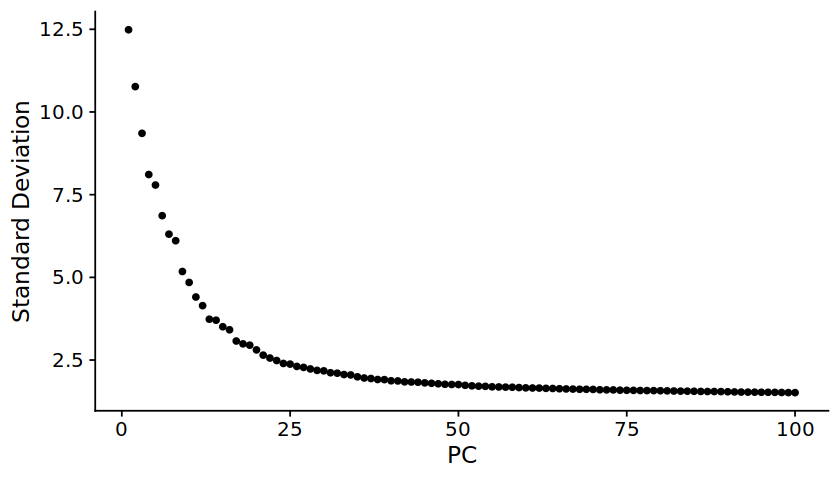

In [10]:
combineSeuratListPrep = PrepSCTIntegration(object.list = combineSeuratList, anchor.features = hicatMarker)
integrateAnchors = FindIntegrationAnchors(
    object.list = combineSeuratListPrep, normalization.method = "SCT",
    anchor.features = hicatMarker
)
integrateSeurat = IntegrateData(anchorset = integrateAnchors, normalization.method = "SCT")
DefaultAssay(integrateSeurat)
integrateSeurat = RunPCA(integrateSeurat, features = hicatMarker, npcs = 100, verbose = FALSE)
options(repr.plot.width=7, repr.plot.height=4)
ElbowPlot(integrateSeurat, ndims = 100)
# integrateSeurat = FindNeighbors(integrateSeurat, reduction = "pca", dims = 1:100, nn.eps = 0)
# integrateSeurat = FindClusters(integrateSeurat, resolution = 6, n.start = 100) 
# integrateSeurat = RunTSNE(integrateSeurat, dims = 1:100)
# integrateSeurat = RunUMAP(integrateSeurat, dims = 1:100)

integrateSeurat = FindNeighbors(integrateSeurat, reduction = "pca", dims = 1:100) %>%
    FindClusters(resolution = 3, n.start = 10, algorithm=1) %>%
    RunTSNE(dims = 1:100) %>%
    RunUMAP(dims = 1:100)

In [11]:
outdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240130/data'

saveRDS(integrateSeurat, paste0(outdir, "/3species_integrate_seurat_down300_0301.rds"))


In [12]:
unique(integrateSeurat$Cluster)

[1] "GLUT_GNB4-_14"      "GLUT_GNB4+_0"       "GLUT_VENO_9"       
  [4] "GLUT_GNB4+_8"       "GLUT_GNB4-_13"      "GLUT_GNB4-_16"     
  [7] "GLUT_GNB4+_4"       "GLUT_VENO_10"       "GLUT_VENO_5"       
 [10] "GLUT_GNB4+_7"       "GLUT_GNB4+_15"      "GLUT_GNB4-_3"      
 [13] "GLUT_GNB4-_12"      "GLUT_GNB4-_11"      "GLUT_GNB4-_6"      
 [16] "GLUT_GNB4+_2"       "GLUT_GNB4+_18"      "GLUT_GNB4-_19"     
 [19] "GLUT_GNB4+_1"       "GLUT_GNB4+_17"      "GABA_LAMP5_LHX6_4" 
 [22] "GABA_RELN_8"        "GABA_SST_1"         "GABA_PVALB_7"      
 [25] "GABA_SST_6"         "GABA_VIP_5"         "GABA_PVALB_2"      
 [28] "GABA_LAMP5_9"       "GABA_PVALB_0"       "GABA_CHC_10"       
 [31] "GABA_PVALB_3"       "OPC_0"              "Microglia_0"       
 [34] "GABA_DRD2_0"        "Oligo_1"            "Astrocytes_0"      
 [37] "Oligo_0"            "Astrocytes_1"       "GLUT_VENO_17"      
 [40] "GLUT_GNB4-_8"       "GLUT_VENO_7"        "GLUT_GNB4+_9"      
 [43] "GLUT_GNB4+_22"      "GLUT_VENO_0"        "GLUT_VENO_14"      
 [46] "GLUT_GNB4-_20"      "GLUT_VENO_1"        "GLUT_VENO_16"      
 [49] "GLUT_VENO_4"        "GLUT_GNB4-_15"      "GLUT_VENO_19"      
 [52] "GLUT_GNB4-_5"       "GLUT_GNB4-_18"      "GLUT_GNB4-_21"     
 [55] "GABA_SST_11"        "GABA_LAMP5_6"       "GABA_VIP_12"       
 [58] "GABA_PVALB_5"       "GABA_CHC_17"        "GABA_RELN_9"       
 [61] "GABA_PVALB_4"       "GABA_LAMP5_LHX6_13" "GABA_CHC_15"       
 [64] "GABA_SST_3"         "GABA_SST_14"        "GABA_PVALB_8"      
 [67] "GABA_PVALB_10"      "GABA_SST_7"         "GABA_DRD2_2"       
 [70] "Astrocytes_3"       "Microglia_1"        "GABA_DRD2_3"       
 [73] "Endotheial_0"       "Oligo_2"            "Astrocytes_2"      
 [76] "Endotheial_3"       "GABA_DRD2_1"        "Oligo_3"           
 [79] "Oligo_4"            "OPC_1"              "Endotheial_1"      
 [82] "GLUT_GNB4-_23"      "GLUT_VENO_15"       "GLUT_GNB4-_17"     
 [85] "GLUT_GNB4-_10"      "GLUT_VENO_21"       "GLUT_GNB4-_9"      
 [88] "GLUT_GNB4+_16"      "GLUT_GNB4+_13"      "GLUT_GNB4+_5"      
 [91] "GLUT_GNB4+_3"       "GLUT_VENO_12"       "GLUT_GNB4+_11"     
 [94] "GABA_VIP_6"         "GABA_PVALB_1"       "GABA_CHC_9"        
 [97] "GABA_SST_15"        "GABA_RELN_13"       "GABA_PVALB_14"     
[100] "GABA_LAMP5_4"       "GABA_PVALB_12"      "GABA_VIP_3"        
[103] "GABA_SST_5"         "GABA_LAMP5_LHX6_0"  "GABA_VIP_11"       
[106] "GABA_RELN_10"

In [ ]:
#!/bin/bash
#SBATCH -e /home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240123/err
#SBATCH -o /home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240123/out
#SBATCH -J merge_ALL_EXIN
#SBATCH -p pro
#SBATCH -n 1
#SBATCH --mem 700000
Rscript /home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240123/merge_ALL_EXIN.R
